# 5.2.2 Ταξινομησιμότητα Βαθμού Δικτύων Αναφορών Χρηστών

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 

%load_ext autoreload

import matplotlib.pyplot as plt
%matplotlib inline
import random

In [1]:
GG={}
import glob,os
# fildir='/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'
fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'

os.chdir(fildir)
graphnames=glob.glob('*.gpic')
if len(graphnames)==0:
    print 'No graphs'
for grns in graphnames:
    ww=int(grns.split('_')[-1].split('.')[0])
    G=nx.read_gpickle(grns)
    
    G.name="G_%s" %ww
    GG[ww]=G

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut mentions network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1

In [4]:
ddg=[]
# for i in range(len(GG)-1):
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg), GG.keys()

[] 0 [1, 2, 3, 4, 5, 6, 7, 8, 44, 10, 11, 12, 13, 14, 15, 16, 49, 50, 9]


In [22]:
import numpy as np
import scipy as sci
lscc=[]
for k,Gg in GG.items():
    G=nx.DiGraph(Gg)
    ddac=nx.degree_pearson_correlation_coefficient(G,weight=2) 

        
    lscc.append(ddac)
print lscc,len(lscc)
# 
nGG=[]
for k,i in GG.items():
    nGG.append(i.name)
print nGG

[-0.096937503401182082, -0.13062600782058281, -0.12939357546228014, -0.089751402177354236, -0.074837808627164437, -0.10582086485952524, -0.11733476062099724, -0.29918675081695512, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.35634832254989918] 19
['G_1', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_12', 'G_10', 'G_11', 'G_44', 'G_13', 'G_14', 'G_15', 'G_16', 'G_49', 'G_50', 'G_9']


In [117]:
ddd=zip(nGG,lscc)
print ddd

[('G_1', -0.09693750340118204), ('G_2', -0.13062600782058281), ('G_3', -0.12939357546228011), ('G_4', -0.089751402177354223), ('G_5', -0.074837808627164423), ('G_6', -0.10582086485952527), ('G_7', -0.11733476062099724), ('G_8', -0.29918675081695506), ('G_44', nan), ('G_10', nan), ('G_11', nan), ('G_12', nan), ('G_13', nan), ('G_14', nan), ('G_15', nan), ('G_16', nan), ('G_49', nan), ('G_50', nan), ('G_9', -0.35634832254989918)]


In [120]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['cut mention graph', 'degree assortativity coefficient']
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf

,cut mention graph,degree assortativity coefficient,cut-off values
0,G_1,-0.096938,1
1,G_2,-0.130626,2
2,G_3,-0.129394,3
3,G_4,-0.089751,4
4,G_5,-0.074838,5
5,G_6,-0.105821,6
6,G_7,-0.117335,7
7,G_8,-0.299187,8
18,G_9,-0.356348,9
9,G_10,NaN,10


In [7]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['cut mention graph', 'degree assortativity coefficient']
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf

,cut mention graph,degree assortativity coefficient,cut-off values
0,G_1,-0.134745,1
1,G_2,-0.142667,2
2,G_3,-0.141643,3
3,G_4,-0.092862,4
4,G_5,-0.074387,5
5,G_6,-0.111659,6
6,G_7,-0.119048,7
7,G_8,-0.239243,8
18,G_9,-0.260417,9
9,G_10,-0.111111,10


In [121]:
cdf.to_pickle("/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df5_2_2")
# cdf.to_pickle("/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes/df5_2_2")

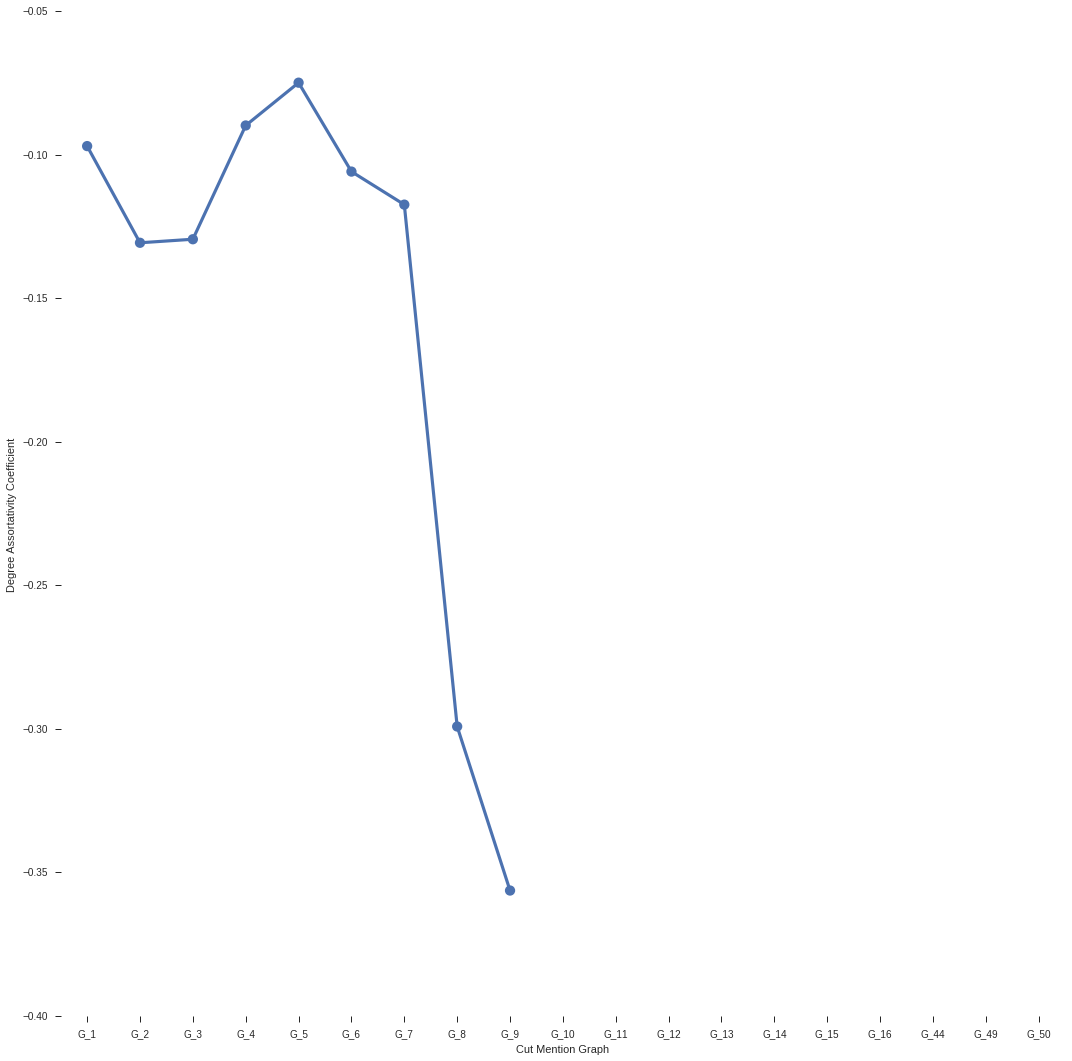

In [122]:
x = cdf["cut mention graph"]
y = cdf["degree assortativity coefficient"]
plt.figure(figsize=(18,18))

ax = sns.pointplot(x, y)

ax.set(xlabel='Cut Mention Graph',ylabel='Degree Assortativity Coefficient')
sns.set(font='sans-serif', font_scale=3)
sns.despine(ax=ax, bottom=True, left=True)


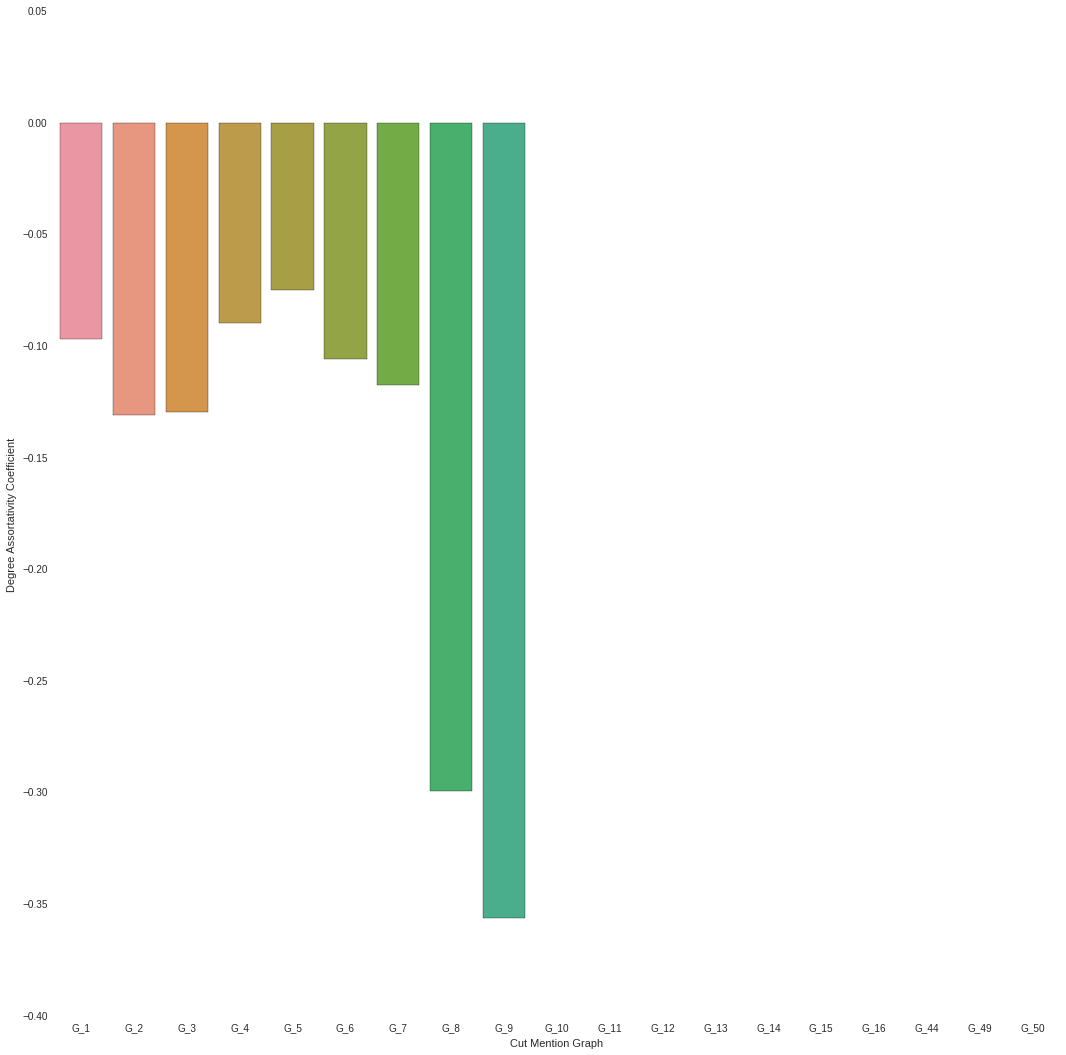

In [133]:
x = cdf["cut mention graph"]
y = cdf["degree assortativity coefficient"]
plt.figure(figsize=(18,18))

ax = sns.barplot(x, y)

ax.set(xlabel='Cut Mention Graph',ylabel='Degree Assortativity Coefficient')
sns.set(font='sans-serif', font_scale=1)
sns.despine(ax=ax, bottom=True, left=True)

ax.set_axis_bgcolor('white')

plt.show()